## *Importing Required Libraries and Setup*

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
#pickle can be used for serialising the objects and converting to byte=streams

In [44]:
!pip install emoji
!pip install vaderSentiment
!pip install TextBlob

In [45]:
from emoji import UNICODE_EMOJI
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from textblob import Word

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
file_db= "/content/Presidential_debate1_comments.csv"
df = pd.read_csv(file_db)

In [48]:
df.keys()

Index(['Unnamed: 0', 'comment', 'comment_id', 'author_url', 'author_name',
       'reply_count', 'like_count', 'date', 'total_reply_counts', 'just_date'],
      dtype='object')

In [49]:
df.shape

(54253, 10)

In [50]:
debate_comments = df

In [51]:
def preprocess(comment):
  comment = comment.str.replace("\n"," ")
  #removing new lines
  return comment

debate_comments['comment']= preprocess(debate_comments['comment'])

In [52]:
#removing NaN values and Empty Strings
debate_comments1=debate_comments
"""debate_comments.dropna(inplace = True)
blanks=[]
for i,lb,rv in debate_comments.itertuples():
  if type(rv) ==str:
    if rv.isspace():
      blanks.append(i)

debate_comments.drop(blanks,inplace=True)"""

'debate_comments.dropna(inplace = True)\nblanks=[]\nfor i,lb,rv in debate_comments.itertuples():\n  if type(rv) ==str:\n    if rv.isspace():\n      blanks.append(i)\n\ndebate_comments.drop(blanks,inplace=True)'

## *Using Vader for Sentimental Analysis*

In [53]:
#Vader is used for detecting both polarity and intensity of emotion, it can be applied to unlabelled text data
#Sentiment score is obtained by summing up the intensity of each word in the text

In [54]:
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(debate_comments.comment[0])
debate_comments['vader_sentiment'] = debate_comments.comment.apply(lambda x: sentiment.polarity_scores(x))
debate_comments['vader_negative'] = debate_comments.vader_sentiment.apply(lambda x: x['neg'])
debate_comments['vader_positive'] = debate_comments.vader_sentiment.apply(lambda x: x['pos'])
debate_comments['vader_compound'] = debate_comments.vader_sentiment.apply(lambda x: x['compound'])
#compund scores are got by normalizing the neutral,negative and positive scores

In [55]:
#Finding out the most positive comments
debate_comments.sort_values(by=['vader_compound'], ascending = False)[['comment']].head(15)

comment
1214                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [56]:
#Finding out the most negative comments
debate_comments.sort_values(by=['vader_compound'],ascending=True)[['comment']].head(15)

comment
1785   *****Antifa opposes tyrannical UnBiblical government that controls peoples and nation, subjecting them to constraints, that suppress peoples and their freedoms. Fascism is when the church of Revelation/Apocalypse 17,18 join forces to eliminate all opposition. Antifa opposes, what God also opposes. In the scriptures cited, we see that there is a kingdom, that rules over other kingdoms. This is the Vatican city State, which it mentions in the scriptures as riding the Roman Empire. It has a King, which is the Pope. If you look at history, you will see that Popes have installed governments of the world. The Pope claims to be in the position of God's representative in the earth, but the scriptures cited show that God opposes this government church alliance. It mentions what the people of this city state wear, scarlet(Cardinals) and Purple(Bishops), which are the colors of the Catholic Church. Hitler and Mussolini were both Roman Catholic, and they joined with the church in exterminating their enemies. They started by creating gangs, that would destroy the property of Jews and those opposing their rulership. They smashed out all the store windows, burned and looted Jewish businesses. Like what is happening today. Before they blamed it on the Jews, today on Antifa and BLM, because they plan to slaughter them as they did the Jews. After breaking and burning their business and blaming the violence on the Jews, they started rounding up people under the guise of a Typus epidemic. For the protection of people, they started putting Jews in concentration camps, and today the same thing is happening, people being killed under the guise of a Corona virus. They plan to start putting people in to concentration camps soon. There is a fenced holding center near me, with communication and guard tower, and high fences. To my understanding there are concentration camps being built all over the world to deal with people who have learned about what Revelation/Apocalypse 17, 18 says. We see there, that it says, in this Church Government was found the blood of the prophets, holy ones, and all those who have been exterminated from the earth. People are being illegally forced to wear masks, so that those destroying property and committing violence can not be identified. They are setting up for the slaughter of BLM and Antifa for these crimes, just as Hitler, Mussolini did to the Jews. George Floyd was killed right in front of the world, by 4 police officers. They had called an ambulance, because there was a man in respiratory distress, and later they said he was in respiratory failure. A Corona virus victim, right in front of our eyes. The ambulance workers are guilty also. They know what is going on. When they arrive, the guy checked his pulse, with three cops on top of him(he was dead, from the police). An other Black man Jacob Blake was shot in the back multiple times by the police. The guy was casually walking, like he didn't know any thing was going on. That was caught on video also. To try to make Antifa BLM look like they are evil and deserving of this evil.  The police stage some killings, where they had a blue lives matter, aspiring German police officer aspirant from an other state, come to Kenosha and kill some people. There is video of the police thanking this group of men and boys(including the killer Kyle Rittenhouse) with semi automatic weapons for coming, and offering them some bottles of water. Kyle Rittenhouse (German kid) wearing the same latex blue gloves that police wear, when they are about to kill some one. Kyle killed a young man, phones some one, admitting, that he just killed some one, and this was caught on video, even though this heavily armed group had said, turn off all cameras, just before the shooting, which was also recorded on video. Kyle ran from there, down the street to were a group of about 5 police armoured vehicles were, but not before killing another person trying to stop him for killing the first pe

In [57]:
#Displaying the respective scores of comments
debate_comments[['comment','vader_sentiment']].head(20)

,comment,vader_sentiment
0,54:50 Did you use the word smart? I Am DYIN,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}"
1,44:41 It is mental LMFAO . Wow a new height of the greatest nation in the world,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.9222}"
2,I wanted Lawrence O'Donnell as the moderator.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,*HOTSLUT.LIVE* みゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ TANTA BEYEZAS QUE DIOS A HECHO EN ESTE MUNDO ASERE Y DISEN QUE DIOS ES MALO SI DIOS ES MALO NADIE ES BUENO ASERE MIL GRASIAS POR TANTA BEYESAS I loro stati di salute rispettivi prevenirli ライブ配信の再編ありがとうです！この日のライブ配信は、かならりやばかったですね！１万人を超える人が見ていたもんね（笑）やっぱり人参最高！まさかのカメラ切り忘れでやら1かしたのもドキドキでした！今後は気を51x62946,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,I think if they announced they had a vaccine before the election trump might have won.,"{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.5719}"
5,i dont have anything to say about Chris Wallace,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
6,1:52:50 is my favorite part!,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.5093}"
7,I still don't know how Biden won.. Trump was like leading every poll. #suspicious,"{'neg': 0.127, 'neu': 0.558, 'pos': 0.315, 'compound': 0.5719}"
8,Fun fact: Biden is NOT the president and this election is still under investigation. Trump 2020 💪🏿💪🏿,"{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.5106}"
9,trump is saving the country and biden is like uh... you uh... shut up man uh... you know the thing.,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.3612}"


In [58]:
#Making compound sentiments a separate column with all values >0 positive comments and lesser than 0 negative comments
debate_comments['compound']= debate_comments['vader_sentiment'].apply(lambda score: score['compound'])
debate_comments['compound_score']= debate_comments['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
debate_comments[['comment','vader_sentiment','compound','compound_score']].head(20)

,comment,vader_sentiment,compound,compound_score
0,54:50 Did you use the word smart? I Am DYIN,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}",0.4019,pos
1,44:41 It is mental LMFAO . Wow a new height of the greatest nation in the world,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.9222}",0.9222,pos
2,I wanted Lawrence O'Donnell as the moderator.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos
3,*HOTSLUT.LIVE* みゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ TANTA BEYEZAS QUE DIOS A HECHO EN ESTE MUNDO ASERE Y DISEN QUE DIOS ES MALO SI DIOS ES MALO NADIE ES BUENO ASERE MIL GRASIAS POR TANTA BEYESAS I loro stati di salute rispettivi prevenirli ライブ配信の再編ありがとうです！この日のライブ配信は、かならりやばかったですね！１万人を超える人が見ていたもんね（笑）やっぱり人参最高！まさかのカメラ切り忘れでやら1かしたのもドキドキでした！今後は気を51x62946,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos
4,I think if they announced they had a vaccine before the election trump might have won.,"{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.5719}",0.5719,pos
5,i dont have anything to say about Chris Wallace,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos
6,1:52:50 is my favorite part!,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.5093}",0.5093,pos
7,I still don't know how Biden won.. Trump was like leading every poll. #suspicious,"{'neg': 0.127, 'neu': 0.558, 'pos': 0.315, 'compound': 0.5719}",0.5719,pos
8,Fun fact: Biden is NOT the president and this election is still under investigation. Trump 2020 💪🏿💪🏿,"{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.5106}",0.5106,pos
9,trump is saving the country and biden is like uh... you uh... shut up man uh... you know the thing.,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.3612}",0.3612,pos


In [59]:
#Passing a comment to check how the model works
usr_comment = 'Joe Biden gives me hope for a safe new America'
sentiment.polarity_scores(usr_comment)

{'compound': 0.7003, 'neg': 0.0, 'neu': 0.58, 'pos': 0.42}

In [60]:
usr1_comment = 'The Trump era has seen the downfall of America to its Lowest, one of the worst regimes in history'
sentiment.polarity_scores(usr1_comment)

{'compound': -0.7717, 'neg': 0.283, 'neu': 0.717, 'pos': 0.0}

## *Using TextBlob for Sentiment Analysis*

In [61]:
debate_comments['textblob_polarity'] = debate_comments['comment'].map(lambda text: TextBlob(text).sentiment.polarity)
debate_comments['comments_leng']= debate_comments['comment'].astype(str).apply(len)
debate_comments['word_count']= debate_comments['comment'].apply(lambda x: len(str(x).split()))

In [62]:
#Positive comments
debate_comments.sort_values(by=['textblob_polarity'], ascending=False)[['comment','textblob_polarity']].head(15)

,comment,textblob_polarity
9176,A great comedy! Keep ‘me coming....,1.0
32077,It’s a marvelous debate I have ever heard . What do you think?,1.0
16894,Chris Wallace should have shut up and let them go at it! Great entertainment!,1.0
32046,Can’t wait for him to win! Just to watch you dems cry and freak out again... Trump did great! Trump2020!,1.0
46430,This guy cuts trump off in the best parts come on man,1.0
31881,"I can not understand there is a debate , not any correct meaning , Joe Biden speak under correction he is to becoming to a jollity and running of the questions and to evade and inopportune and always laughing for nothing !!!!!.......* * * * * +24=29!!.......",1.0
31876,Make Russia great again!,1.0
31851,"What a clown Trump is... i`f people elect this fool again, USA is lost!",1.0
17046,Best pizza night,1.0
31728,This is best than caso cerrado,1.0


In [63]:
#Negative Comments
debate_comments.sort_values(by=['textblob_polarity'], ascending=False)[['comment','textblob_polarity']].tail(15)

,comment,textblob_polarity
44434,WALLACE IS WORKING FOR BIDEN. BIDEN IS THE WORST EVER.,-1.0
21091,"""Trump vs Beavis Buthead ...only an idiot laughs at everything!""",-1.0
17093,Boring,-1.0
19084,"Fox News should fire his dumb ass, they should have Ben Shapiro be the one ask questions, Ben, Ben, Ben, Ben!!!!!!!!!",-1.0
17075,All these candidates are pathetic...,-1.0
17069,"ANNOYING PRESIDENT, YAP YAP YAP!!!",-1.0
23987,"It’s official, worst reality show ever!! 🤦‍♂️",-1.0
44411,Terrible debate. Absolutely terrible. Trump2020!,-1.0
992,Trump is being real pathetic here,-1.0
21125,"Pore Biden, he was over spoken and degraded by a degenerate moron!",-1.0


In [64]:
#Neutral Comments on the Debate
textblob_neutral = debate_comments.query('textblob_polarity == 0').rename(columns={"comment":"textblob_comment"})[['textblob_comment']].reset_index(drop=True)
vader_neutral = debate_comments.query('vader_compound == 0').rename(columns={"comment": "vader_comment"})[['vader_comment']].reset_index(drop=True)
vader_neutral

,vader_comment
0,I wanted Lawrence O'Donnell as the moderator.
1,*HOTSLUT.LIVE* みゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ TANTA BEYEZAS QUE DIOS A HECHO EN ESTE MUNDO ASERE Y DISEN QUE DIOS ES MALO SI DIOS ES MALO NADIE ES BUENO ASERE MIL GRASIAS POR TANTA BEYESAS I loro stati di salute rispettivi prevenirli ライブ配信の再編ありがとうです！この日のライブ配信は、かならりやばかったですね！１万人を超える人が見ていたもんね（笑）やっぱり人参最高！まさかのカメラ切り忘れでやら1かしたのもドキドキでした！今後は気を51x62946
2,i dont have anything to say about Chris Wallace
3,Look up loser.com
4,28:15:00
...,...
14917,Bru
14918,Where’s these comments
14919,H
14920,first


In [65]:
textblob_neutral

,textblob_comment
0,I wanted Lawrence O'Donnell as the moderator.
1,*HOTSLUT.LIVE* みゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ TANTA BEYEZAS QUE DIOS A HECHO EN ESTE MUNDO ASERE Y DISEN QUE DIOS ES MALO SI DIOS ES MALO NADIE ES BUENO ASERE MIL GRASIAS POR TANTA BEYESAS I loro stati di salute rispettivi prevenirli ライブ配信の再編ありがとうです！この日のライブ配信は、かならりやばかったですね！１万人を超える人が見ていたもんね（笑）やっぱり人参最高！まさかのカメラ切り忘れでやら1かしたのもドキドキでした！今後は気を51x62946
2,I think if they announced they had a vaccine before the election trump might have won.
3,i dont have anything to say about Chris Wallace
4,I still don't know how Biden won.. Trump was like leading every poll. #suspicious
...,...
22717,Biden got destroyed
22718,Bru
22719,Where’s these comments
22720,H


## *Exploratory Data Analysis*

In [66]:
#Comment with most number of likes
pd.set_option('display.max_colwidth',None)
debate_comments.sort_values(by=['like_count'],ascending=False)[['comment']].head(15)

,comment
28398,Gordon Ramsey would be a much better moderator for the next debate.
22986,"This isn't a presidential debate, this is an emergency meeting discussion in Among Us."
26682,"I’m sorry, but high school debates are more professional than this presidential monstrosity."
7385,This Debate is hilarious as hell until you realize one of them will be president
11861,The fact that most of us came for comedy instead of serious politics is astounding
52370,Why can’t they just shut off one of the mics when the other person is talking?!🤪
33566,This was the worse Presidential debate in modern American history.
32764,This would be sooo funny if they weren’t running for president
19993,In conclusion: “You did that” “No I didn’t” “You’re a clown” “Your son is a drug addict” “Let me talk” “Shut up” “no”
39025,They need an Italian grandma as the moderator lol


In [67]:
debate_comments.columns

Index(['Unnamed: 0', 'comment', 'comment_id', 'author_url', 'author_name',
       'reply_count', 'like_count', 'date', 'total_reply_counts', 'just_date',
       'vader_sentiment', 'vader_negative', 'vader_positive', 'vader_compound',
       'compound', 'compound_score', 'textblob_polarity', 'comments_leng',
       'word_count'],
      dtype='object')

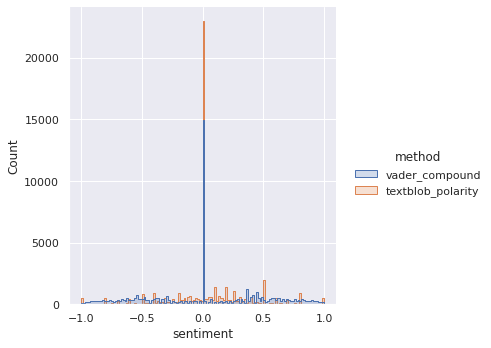

In [68]:
comp = debate_comments[['comment','vader_compound','textblob_polarity','just_date','comments_leng','word_count','like_count']]
pol_hist = comp.melt(id_vars=['comment','just_date','comments_leng','word_count','like_count'],value_vars=['vader_compound','textblob_polarity'],var_name='method',value_name='sentiment')
sns.displot(pol_hist,x="sentiment",hue="method",element="step")

We see most comments are in the neutral range as seen by both methods used as well as the count of comments more positive in the textblob polarity ones

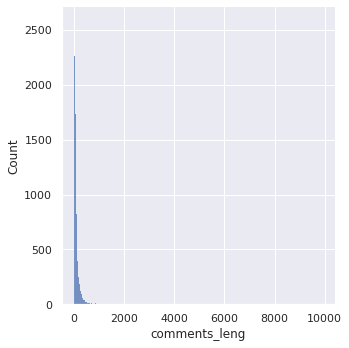

In [69]:
#Length of comments in terms of Characters
textblob_ch1= pol_hist.query('method == "textblob_polarity"')
sns.displot(textblob_ch1,x="comments_leng")

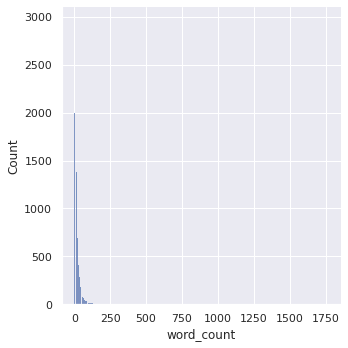

In [70]:
#plot similarly for word count
sns.displot(textblob_ch1, x="word_count")

In [71]:
pol_hist.columns

Index(['comment', 'just_date', 'comments_leng', 'word_count', 'like_count',
       'method', 'sentiment'],
      dtype='object')

In [72]:
debate_comments.groupby('comment').mean()[['textblob_polarity']].sort_values(by=['textblob_polarity'],ascending=True)

,textblob_polarity
comment,
Even Chris Wallace was laughing at the end of the debate which just shows you how pathetic was.,-1.0
Both are terrible.,-1.0
what??? “ pregnancy is a pre existing condition “ whaaaaaat??? that’s insane,-1.0
Chris Wallace was terrible,-1.0
"Ouchh, 10 minutes in debate, gets you thinking why Chris is not standing beside Biden by his side. It´s just pathetic, never allow this man moderating again please.",-1.0
...,...
This is the best entertainment I can find at 1 in the morn,1.0
These are headmasters at best,1.0
Comment the best time stamps on this comment.,1.0


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '36'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '44'),
 Text(0, 0, '45'),
 Text(0, 0, '46'),
 Text(0, 0, '47'),
 Text(0, 0, '48'),
 Text(0, 0, '49'),
 Text(0, 0, '50'),
 Text(0, 0, '51'),
 Text(0, 0, '52'),
 Te

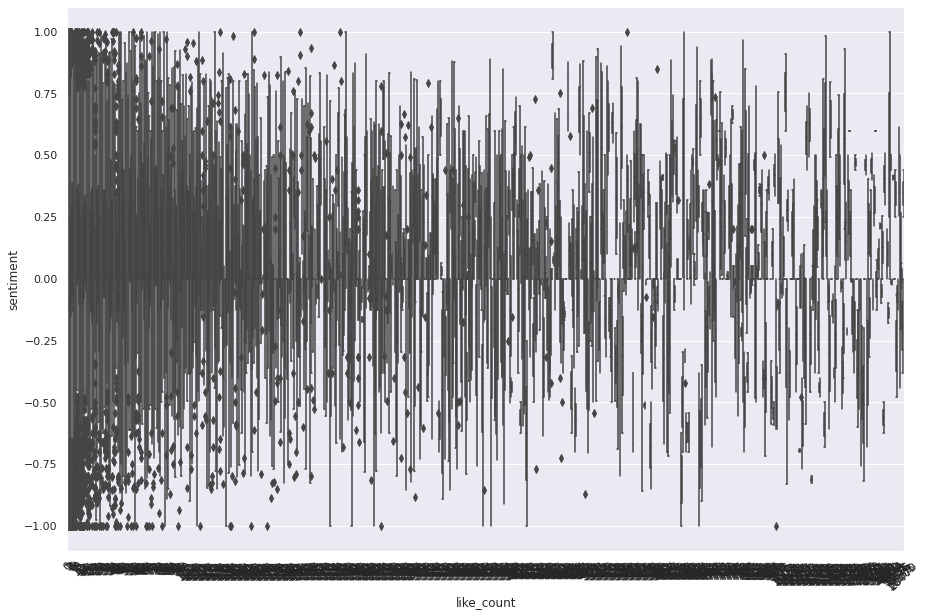

In [73]:
sns.set(rc={'figure.figsize':(15,10)})
axis = sns.boxplot(x="like_count",y="sentiment",data=pol_hist)
axis.set_xticklabels(axis.get_xticklabels(),rotation=45)

*Here we see the number of likes is higher for either side of the polarity*

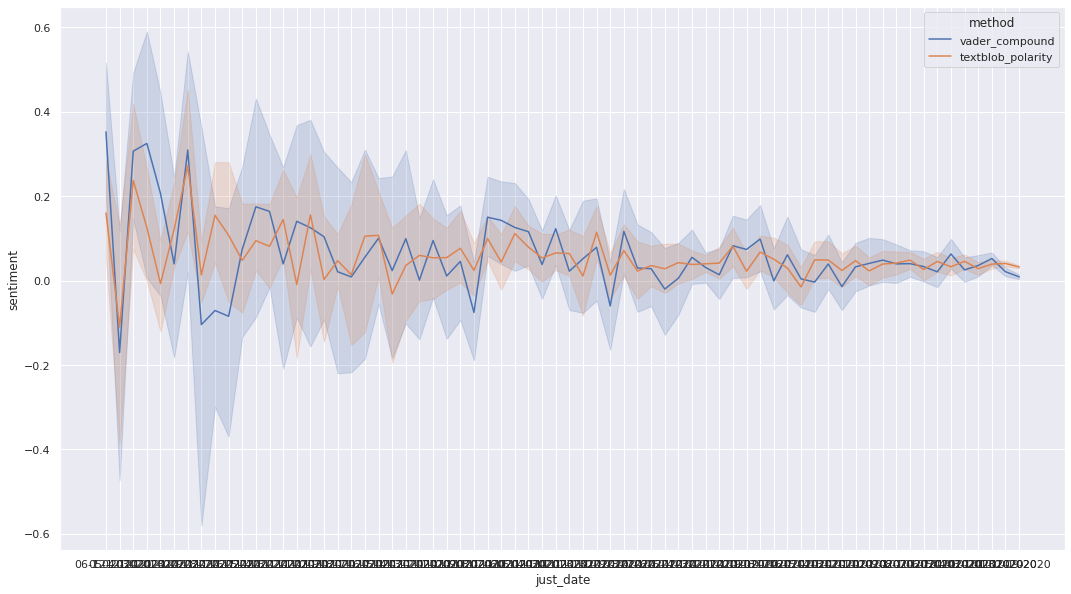

In [74]:
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(x="just_date",y="sentiment",data=pol_hist,hue="method")

*Using Scattertext to find out the common words in the comment section. Scattertext Corpus- body of words*

In [75]:
!pip install scattertext
import scattertext as st
import spacy.cli
spacy.cli.download("en_core_web_lg")

     |████████████████████████████████| 7.3MB 5.1MB/s 
     |████████████████████████████████| 23.9MB 117kB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=dd5cb8c16097fd8e48709bdce4a06f19777e2c7a4e4ad2ec6fef4f73958d29b3
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


*For differentiating words of different categories and provide the associations, we construct the corpus*

In [100]:
nlp = spacy.load('en_core_web_lg')
corpus = st.CorpusFromPandas(textblob_ch1,category_col='like_count',text_col='comment',nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:20]))

['biden', 'trump', 'covid', 'obama', 'interrupting', 'maga', 'trumps', 'gon', 'debate', 'bidens', 'antifa', 'wallace', 'lmao', 'rogan', 'clown', 'debating', 'liar', 'youtube', 'bruh', 'joe']


In [102]:
#debate_comments.columns

## *Unsupervised Learning - K-means Clustering of the Comments of the Debate*

In [77]:
#credits https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d
import nltk
import string
import emoji
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [78]:
#Removal of emojis
def remove_emoji(text):
  allchar = [str for str in text]
  emoji_list = [c for c in allchar if c in emoji.UNICODE_EMOJI]
  new_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
  return new_text

*PorterStemmer uses Suffix Stripping to produce stems*

In [79]:
def text_process(text):
    stemmer = PorterStemmer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    temp = [stemmer.stem(word) for word in nopunc]

    joined = ' '.join(temp)
    # remove emojis 
    joined = remove_emoji(joined)
    return joined.split()

*Using WordNetLemmatizer reduces the inflected words properly ensuring that the root word belongs to the language.*

In [80]:
#Text Cleaning
def text_clean(text):
#Removal of punctuation, stop words, and returning the clean text as a list of words by join
  stemmer= WordNetLemmatizer()
  rmvpunc = [char for char in text if char not in string.punctuation]
  rmvpunc = ''.join([i for i in rmvpunc if not i.isdigit()])
  rmvpunc = [word.lower() for word in rmvpunc.split() if word not in stopwords.words('english')]
  temp = [stemmer.lemmatize(word) for word in rmvpunc]
  text1= ' '.join(temp)
  text1 = remove_emoji(text1)
  return text1.split()  

*Stop words: Stop Words are words which do not contain important significance to be used in Search Queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information*

In [87]:
#tfidf vectorization
d1= df['comment'].values
vectorizer = TfidfVectorizer(analyzer = text_process,stop_words={'english'})
X = vectorizer.fit_transform(d1)

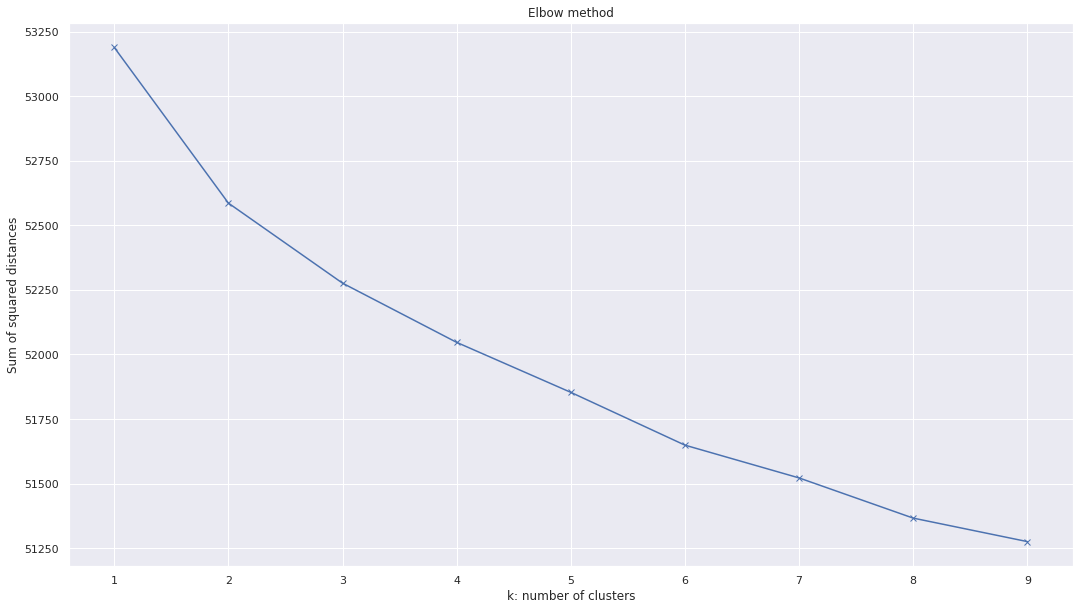

In [83]:
#Text Vectorization
#we use the CountVectorizer to count how many times tokens appear in a corpus
sum_ss = []
K = range(1,10)

for k in K:
  km =  KMeans(n_clusters=k,max_iter=200,n_init=10,random_state=0,init='k-means++')
  km=km.fit(X)
  sum_ss.append(km.inertia_)

plt.plot(K,sum_ss,'bx-')
plt.xlabel('k: number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method')
plt.savefig('elbow.png')
plt.show()

# *We notice a bump at around 2 which shows us that thats the ideal of number of clusters*

# Most Common words for positive and neutral sentiment in the centroid lines

In [89]:
kmeans = KMeans(n_clusters = 2, n_init = 20, n_jobs = 1)
kmeans.fit(X)
words = vectorizer.get_feature_names()
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : trump, biden, i, debat, joe, like, presid, thi, the, moder, vote, peopl, watch, fuck, talk, wallac, he, get, one, say, time, go, america, lol, chri
1 : trump, fuck, go, vote, biden, presid, debat, like, one, moder, joe, savag, get, behav, peopl, beauti, piec, i, weak, bless, support, babi, heard, love, anoth


# *Comments and their respective cluster values*

In [91]:
true_k=3
model = KMeans(n_clusters=true_k,init='k-means++',max_iter=200,n_init=10)
model.fit(X)
label = model.labels_
df1=pd.DataFrame(list(zip(d1,label)),columns=['comment','cluster'])
print(df1.sort_values(by=['cluster']))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            comment  cluster
0                                                                                                                                                                                                                                                                                                                                                                          

*The dataframe with comments having higher cluster values*

In [95]:
result_df = df1.loc[df1['cluster'] > 1]
result_df

,comment,cluster
7,I still don't know how Biden won.. Trump was like leading every poll. #suspicious,2
8,Fun fact: Biden is NOT the president and this election is still under investigation. Trump 2020 💪🏿💪🏿,2
18,We are doing good by the way Joe Biden hope Donald Trump good trick,2
26,How was Biden so Calm Throughout This? He didn't even shout at the guy for *2 hours*,2
31,"I could had swore that at some point, during this debate of the second debate, that Biden was asked if he would take the vaccine, and Biden said NO. Anyone else remember this? I listened to time stamp 53-60 to see if I could find it, but I can’t.",2
...,...,...
54209,Damn the the way trump looks at joe every time he talk lol,2
54229,F for Biden,2
54237,Biden got destroyed,2
54239,Biden be dumb,2


## *Creating Word Clouds based on the KMeans Clustering*

Cluster : 0
Titles


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



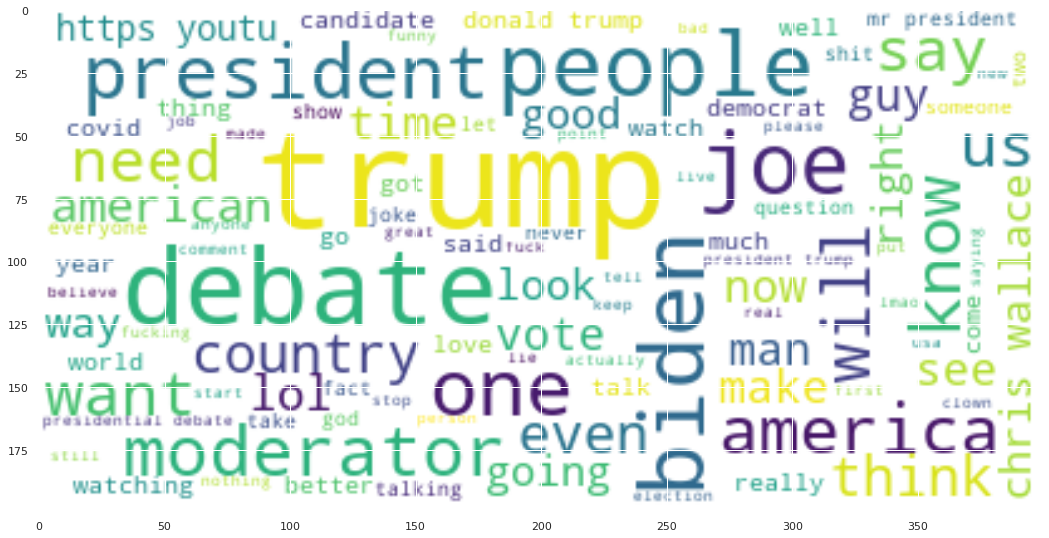

Cluster : 1
Titles
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              TRUMP2020
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

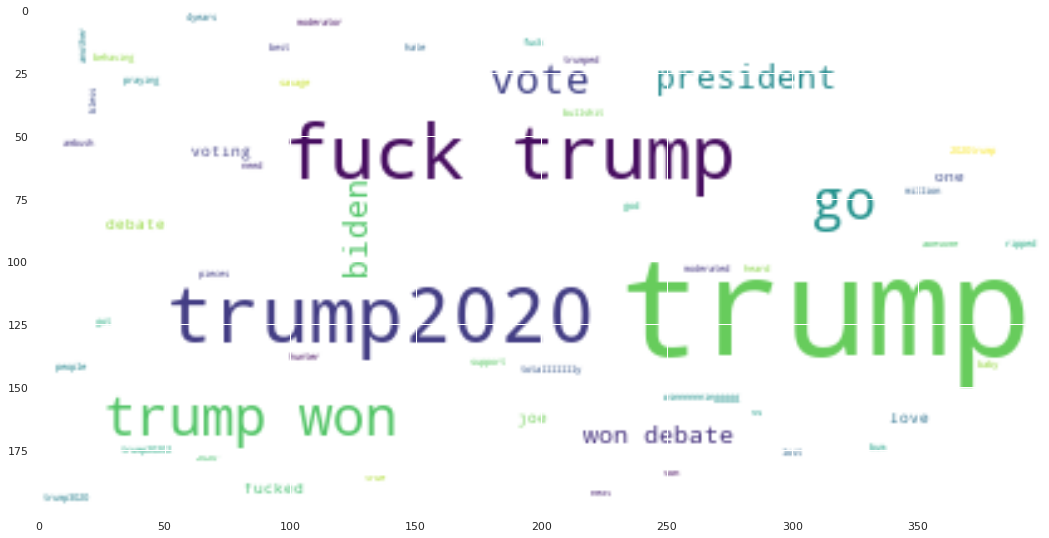

Cluster : 2
Titles


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



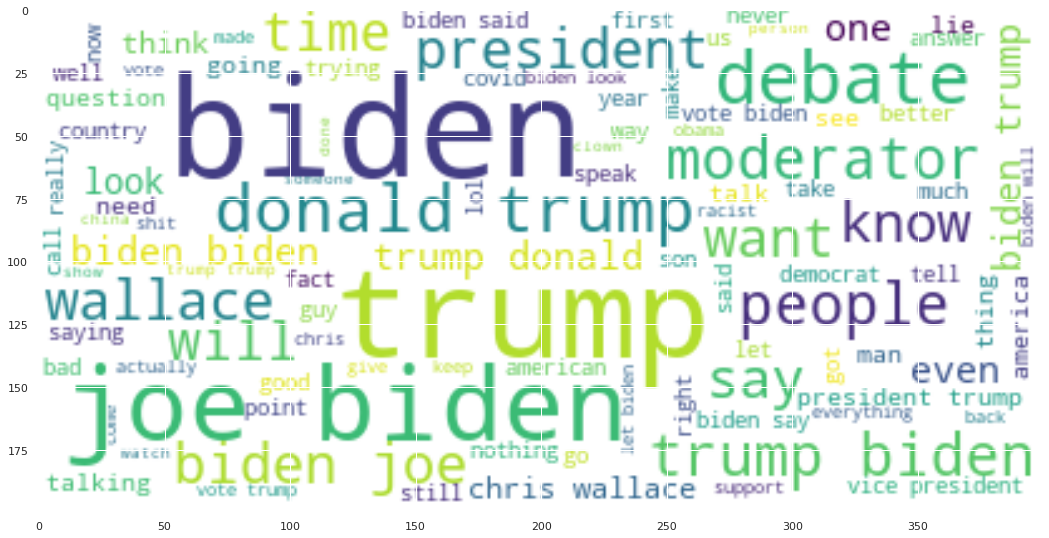

In [98]:
from wordcloud import WordCloud
result = {'cluster':label,'comment':d1}
result  = pd.DataFrame(result)
for k in range (0,true_k):
  c = result[result.cluster==k]
  text = c['comment'].str.cat(sep=' ')
  text = text.lower()
  text = ' '.join([word for word in text.split()])
  wordcloud = WordCloud(max_words=100, max_font_size=55, background_color="white").generate(text)
  print('Cluster : {}'.format(k))
  print('Titles')
  titles=df1[df1.cluster==k]['comment']
  print(titles.to_string(index=False))
  plt.figure()
  plt.imshow(wordcloud,interpolation="bilinear")
  plt.show()

In [101]:
#credits: https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d
          #https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664
#credits: Tina Huang(hellotinah), Ken Jee